In [1]:
from numpy import pi as PI
from scipy.integrate import quad
from scipy.spatial.distance import pdist, cdist, squareform

import scipy
import random
import pandas as pd
import numpy as np
import ringity as rng
import networkx as nx
import matplotlib.pyplot as plt

### Sample distribution

In [2]:
beta = np.random.uniform()

kapp = np.tan(PI/2*beta)
lamb = 1/kapp

In [3]:
N = 2**12

delays = rng.get_delays(N, param=beta)

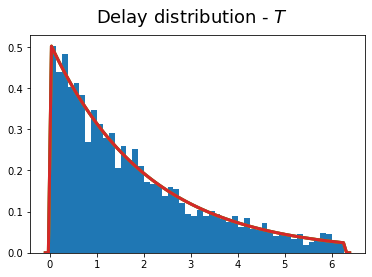

In [4]:
x = np.linspace(-0.1,2*np.pi+0.1,100)

plt.hist(delays, density=True, bins=50);

plt.plot(x, rng.pdf_delay(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_delay(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_delay(x, beta, 'delay'), linewidth=3)

plt.suptitle("Delay distribution - $T$", fontsize=18);

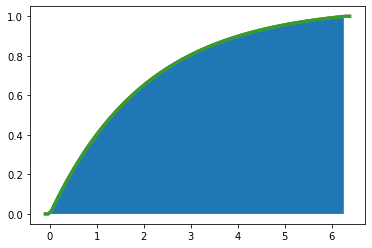

In [5]:
cdf_x = np.sort(delays)
cdf_y = np.arange(len(delays))/len(delays)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_delay(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_delay(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_delay(x, beta, 'delay'), linewidth=3)

### Absolute distance

In [6]:
abs_dists = pdist(delays.reshape(-1,1))

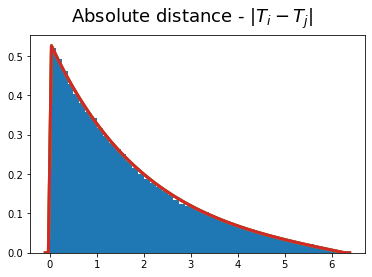

In [7]:
x = np.linspace(-0.1,2*np.pi+0.1,100)

plt.hist(abs_dists, density=True, bins=50);

plt.plot(x, rng.pdf_absolute_distance(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_absolute_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_absolute_distance(x, beta, 'delay'), linewidth=3)

plt.suptitle("Absolute distance - $|T_i - T_j|$", fontsize=18);

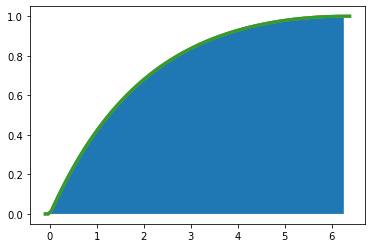

In [8]:
cdf_x = np.sort(abs_dists)
cdf_y = np.arange(len(abs_dists))/len(abs_dists)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, beta, 'delay'), linewidth=3)

### Circular distance

In [9]:
circ_dists = rng.delays_to_distances(delays)

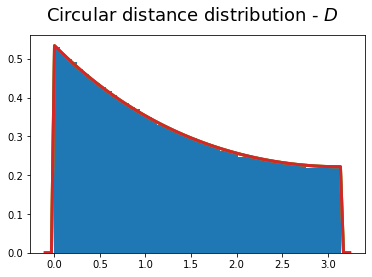

In [10]:
x = np.linspace(-0.1,np.pi+0.1,100)

plt.hist(circ_dists, density=True, bins=50);

plt.plot(x, rng.pdf_circular_distance(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_circular_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_circular_distance(x, beta, 'delay'), linewidth=3)

plt.suptitle("Circular distance distribution - $D$", fontsize=18);

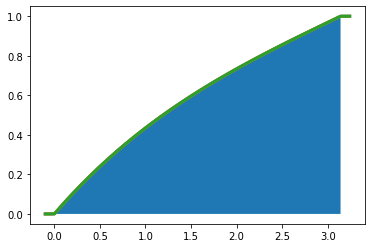

In [11]:
cdf_x = np.sort(circ_dists)
cdf_y = np.arange(len(circ_dists))/len(circ_dists)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, beta, 'delay'), linewidth=3)

### Similarity

In [22]:
a = np.random.uniform(0, 0.5)
print(a)

simis = rng.distances_to_similarities(dists=circ_dists, a=a)

0.4277335451367437


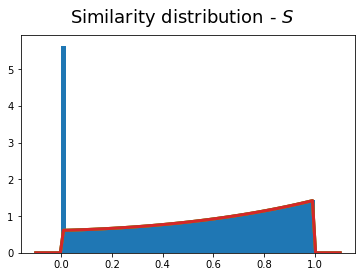

In [23]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(simis, density=True, bins=50);

plt.plot(x, rng.pdf_similarity(x, lamb, a, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_similarity(x, kapp, a, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_similarity(x, beta, a, 'delay'), linewidth=3)

plt.suptitle("Similarity distribution - $S$", fontsize=18);

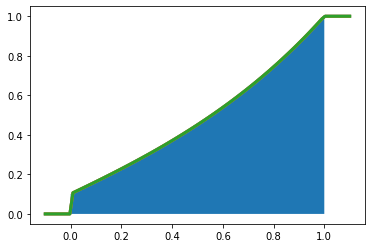

In [24]:
cdf_x = np.sort(simis)
cdf_y = np.arange(len(simis))/len(simis)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_similarity(x, lamb, a, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_similarity(x, kapp, a, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_similarity(x, beta, a, 'delay'), linewidth=3)

In [25]:
print(np.mean(simis))

0.5177031407711479


In [26]:
print(rng.mean_similarity(lamb, a, 'rate'))
print(rng.mean_similarity(kapp, a, 'shape'))
print(rng.mean_similarity(beta, a, 'delay'))

0.5160815421811666
0.5160815421811666
0.5160815421811666


### Probability

In [27]:
rho = np.random.uniform(0,0.5)
mu_S = rng.mean_similarity(lamb, a)

assert rho <= mu_S
k = rho/mu_S

probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=lamb)

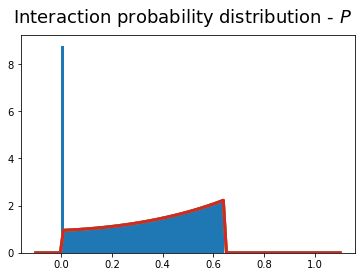

In [28]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(probs, density=True, bins=50);

plt.plot(x, rng.pdf_probability(x, lamb, a, rho, 'rate'), linewidth=3)
plt.plot(x, rng.pdf_probability(x, kapp, a, rho, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_probability(x, beta, a, rho, 'delay'), linewidth=3)

plt.suptitle("Interaction probability distribution - $P$", fontsize=18);

AssertionError: Not implemented yet!

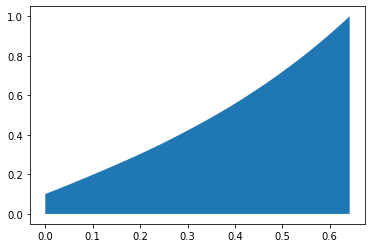

In [29]:
cdf_x = np.sort(probs)
cdf_y = np.arange(len(k*simis))/len(k*simis)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_probability(x, lamb, a, rho, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_probability(x, kapp, a, rho, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_probability(x, beta, a, rho, 'delay'), linewidth=3)

### density

In [30]:
N = 2**10
rho = np.random.uniform()
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

obs_rhos = []

for i in range(100):
    delas = rng.get_delays(N, beta)
    dists = rng.delays_to_distances(delas)
    simis = rng.distances_to_similarities(dists, a=a)
    probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
    obs_rhos.append(np.mean(probs))
    
print(np.mean(obs_rhos))

0.2797616826713964


In [31]:
rho

0.280596904186599

AssertionError: Not implemented yet!

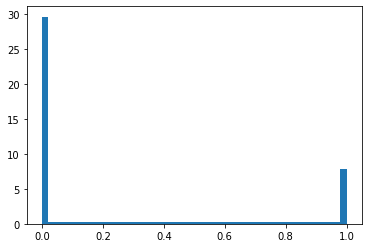

In [32]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(probs, density=True, bins=50);

plt.plot(x, rng.pdf_probability(x, beta, a, rho, 'delay'), linewidth=3)

### Conditional absolute distance

In [33]:
beta = np.random.uniform()
kapp = np.tan(PI/2*beta)
lamb = 1/kapp

print(beta)

0.7092574772282535


In [34]:
N = 2**17
positions = rng.get_positions(N, beta=beta)
delas = rng.get_delays(N, param = beta)

In [35]:
theta, = random.sample(list(delays), 1)

In [36]:
abs_dists = np.abs(delas-theta)

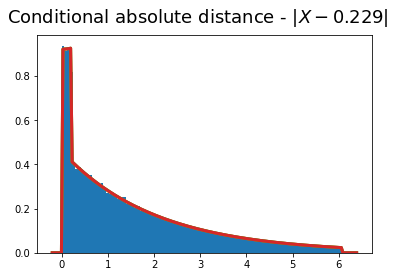

In [37]:
x = np.linspace(-0.2, 2*PI+0.1, 200)

plt.hist(abs_dists, density=True, bins=100);

plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(rf"Conditional absolute distance - $|X-{theta:.3f}|$ ", fontsize=18);

In [38]:
cdf_x = np.sort(abs_dists)
cdf_y = np.arange(N)/N

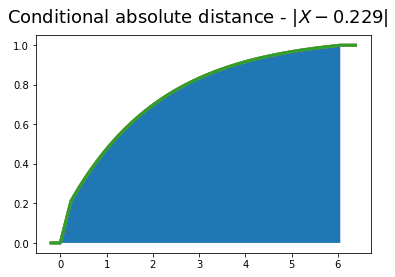

In [39]:
plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(rf"Conditional absolute distance - $|X-{theta:.3f}|$", fontsize=18);

### Conditional circular distance

In [40]:
circ_dists = np.minimum(abs_dists, 2*PI-abs_dists)

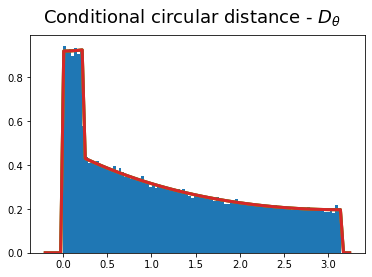

In [41]:
x = np.linspace(-0.2,PI+0.1,100)

plt.hist(circ_dists, density=True, bins=100);

plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(r"Conditional circular distance - $D_{\theta}$", fontsize=18);

In [42]:
cdf_x = np.sort(circ_dists)
cdf_y = np.arange(N)/N

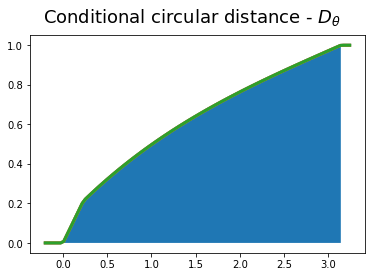

In [43]:
plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(r"Conditional circular distance - $D_{\theta}$", fontsize=18);

### Conditional similarity

In [44]:
a = np.random.uniform(0,0.5)

simis = rng.distances_to_similarities(circ_dists, a=a)

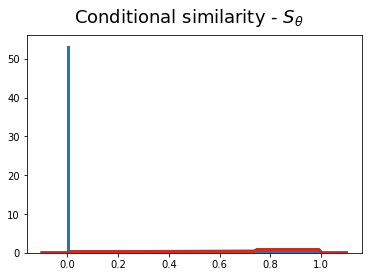

In [45]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(simis, density=True, bins=100);

plt.plot(x, rng.pdf_conditional_similarity(x, theta, a, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.pdf_conditional_similarity(x, theta, a, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_similarity(x, theta, a, beta, 'delay'), linewidth=3)

plt.suptitle(r"Conditional similarity - $S_{\theta}$", fontsize=18);

AssertionError: Not implemented yet!

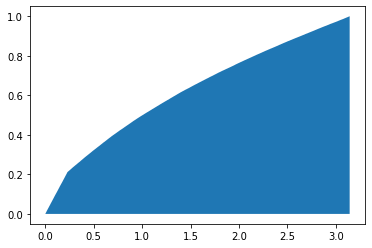

In [46]:
#  Not implemented yet!

cdf_x = np.sort(circ_dists)
cdf_y = np.arange(N)/N

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_conditional_similarity(x, a, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.cdf_conditional_similarity(x, a, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_conditional_similarity(x, a, theta, beta, 'delay'), linewidth=3)


plt.suptitle(r"Conditional similarity - $S_{\theta}$", fontsize=18);

### Conditional probability

In [47]:
rho = np.random.uniform(0,0.1)
mu_S = rng.mean_similarity(lamb, a)

assert rho <= mu_S
k = rho/mu_S

probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=lamb)

print(rho)
print(np.mean(rho))

0.015429776756663939
0.015429776756663939


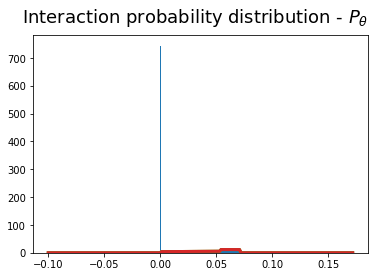

In [48]:
x = np.linspace(-0.1, k+0.1, 200)

plt.hist(probs, density=True, bins=100);
plt.plot(x, rng.pdf_conditional_probability(x, theta, lamb, a, rho, 'rate'), linewidth=3)
plt.plot(x, rng.pdf_conditional_probability(x, theta, kapp, a, rho, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_probability(x, theta, beta, a, rho, 'delay'), linewidth=3)

plt.suptitle(r"Interaction probability distribution - $P_{\theta}$", fontsize=18);

### Degree counts

In [49]:
N = 2**12
rho = np.random.uniform(0,0.5)
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

#### Single node

In [64]:
def expected_node_degree2(theta, a, rho, parameter, parameter_type = 'rate'):
    rate = rng.get_rate_parameter(parameter, parameter_type)
    mu_S = rng.mean_similarity(rate,a)
    k = rho/mu_S
    s_min = np.clip(2-1/a,0,1)
    if k <= 1:
        
        ub1 = min(2*a*PI*(1-s_min), 2*PI-theta)
        
        lb4 = 2*PI-theta
        ub4 = 2*a*PI*(1-s_min)
        
        normalization = k / (1-np.exp(-2*PI*rate))
        
        
        
        if theta < 2*a*PI*(1-s_min):
            integral3a = np.exp((-2*PI + 2*a*PI*(1-s_min) - theta)*rate)*rate - np.exp(-2*PI*rate)*rate
            integral3b = ((np.exp((-2*PI + 2*a*PI*(1-s_min) - theta)*rate)*(-1 + 2*a*PI*(1-s_min)*rate)) - (np.exp(-2*PI*rate)*(-1 + theta*rate)))/rate 
            integral3  = integral3a - integral3b/(2*a*PI)
            
            integral2b = (theta*rate - 1)/(2*a*PI*rate)
            integral_x = 1
        else:
            integral2b = (np.exp(-rate*(theta - 2*a*PI*(1-s_min))) * (2*a*PI*(1-s_min)*rate - 1))/(2*a*PI*rate)
            integral_x = np.exp(-rate*(theta-2*a*PI*(1-s_min)))
            integral3 = 0
        
        if lb4 < ub4:
            integral1b = (2*np.exp(-theta*rate) - np.exp(-2*PI*rate)*(1 + (2*PI-theta)*rate))/(2*a*PI*rate)
            integral4a = -np.exp(-(-2*PI + ub4 + theta)*rate)/rate + np.exp(-(-2*PI + lb4 + theta)*rate)/rate 
            integral4b = -(np.exp(-(-2*PI + ub4 + theta)*rate)*(1 + ub4*rate))/rate + (np.exp(-(-2*PI + lb4 + theta)*rate)*(1 + lb4*rate))/rate
            integral4  = integral4a*rate - integral4b/(2*a*PI)
            
            integral_y = np.exp(-rate*(theta+ub1))
        else:
            integral1b = (2*np.exp(-theta*rate) - np.exp(-(2*a*PI*(1-s_min) + theta)*rate) - np.exp(-(2*a*PI*(1-s_min) + theta)*rate)*2*a*PI*(1-s_min)*rate)/(2*a*PI*rate)
            integral4 = 0
            
            integral_y = np.exp(-rate*(theta+ub1))
            
        return normalization*(integral_x - integral_y - (integral1b + integral2b) + integral3 + integral4)
    else:
        assert False, "Not implemented yet!"

In [252]:
def expected_node_degree1(theta, a, rho, parameter, parameter_type = 'rate'):
    return quad(lambda x : x*rng.pdf_conditional_probability(x, theta=theta, a = a, rho = rho,
                                                             parameter = parameter, 
                                                             parameter_type = parameter_type), 0, 1)[0]

def expected_node_degree2(theta, a, rho, parameter, parameter_type = 'rate'):
    
    if a > 0.5:
        assert False, "Not implemented yet!"
    
    rate = rng.get_rate_parameter(parameter, parameter_type)
    mu_S = rng.mean_similarity(rate,a)
    k = rho/mu_S
    
    if k > 1:
        assert False, "Not implemented yet!"
        
    if theta <= 2*PI*a:
        integral1b = quad(lambda x : (1-x/(2*PI*a))*rng.pdf_delay(theta-x,
                                                              parameter = parameter,
                                                              parameter_type = parameter_type), 
                      0, theta)[0]/(2*PI*a)
        integral2a = quad(lambda x : (1-(2*PI-x)/(2*PI*a))*rng.pdf_delay(theta+x,
                                                                 parameter = parameter,
                                                                 parameter_type = parameter_type), 
                      2*PI-2*PI*a, 2*PI)[0]/(2*PI*a)
    else:
        integral1b = quad(lambda x : (1-x/(2*PI*a))*rng.pdf_delay(theta-x,
                                                              parameter = parameter,
                                                              parameter_type = parameter_type), 
                      0, 2*PI*a)[0]/(2*PI*a)
        integral2a = quad(lambda x : (1-(2*PI-x)/(2*PI*a))*rng.pdf_delay(theta+x,
                                                                 parameter = parameter,
                                                                 parameter_type = parameter_type), 
                      2*PI-2*PI*a, 2*PI)[0]/(2*PI*a)
        
    if theta + 2*a*PI <= 2*PI:
        integral1a = quad(lambda x : (1-x/(2*PI*a))*rng.pdf_delay(theta+x,
                                                                  parameter = parameter,
                                                                  parameter_type = parameter_type), 
                          0, 2*PI*a)[0]/(2*PI*a)
        
        integral2b = quad(lambda x : (1-(2*PI-x)/(2*PI*a))*rng.pdf_delay(theta-x,
                                                                 parameter = parameter,
                                                                 parameter_type = parameter_type), 
                      2*PI-2*PI*a, 2*PI)[0]/(2*PI*a)

    else:
        integral1a = quad(lambda x : (1-x/(2*PI*a))*rng.pdf_delay(theta+x,
                                                                  parameter = parameter,
                                                                  parameter_type = parameter_type), 
                          0, 2*PI-theta)[0]/(2*PI*a)
        
        integral2b = quad(lambda x : (1-(2*PI-x)/(2*PI*a))*rng.pdf_delay(theta-x,
                                                                 parameter = parameter,
                                                                 parameter_type = parameter_type), 
                      2*PI-2*PI*a, 2*PI)[0]/(2*PI*a)
    
    integral1 = integral1a + integral1b
    integral2 = integral2a +integral2b
    
    integral = integral1 + integral2
        
    return k*integral*2*PI*a 

In [255]:
N = 2**12
rho = np.random.uniform(0,0.5)
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

for theta in np.linspace(0, 2*PI, 10):
    
    print(f"node position = {theta}")
    print(45*"-")
    print("       Expected degree1: ", N*expected_node_degree1(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print("       Expected degree2: ", N*expected_node_degree2(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print()

node position = 0.0
---------------------------------------------
       Expected degree1:  1449.3385730844886
       Expected degree2:  1449.338581796299

node position = 0.6981317007977318
---------------------------------------------
       Expected degree1:  1044.90967413463
       Expected degree2:  1044.909661475234

node position = 1.3962634015954636
---------------------------------------------
       Expected degree1:  537.8844572317329
       Expected degree2:  537.8844520882257

node position = 2.0943951023931953
---------------------------------------------
       Expected degree1:  34.4379668878103
       Expected degree2:  34.43796688783185

node position = 2.792526803190927
---------------------------------------------
       Expected degree1:  0.001757569448050323
       Expected degree2:  0.0017575694480510002

node position = 3.490658503988659
---------------------------------------------
       Expected degree1:  8.969897597157468e-08
       Expected degree2:  8.9698

In [256]:
for i in range(10):
    if i == 0:
        theta = 0.001
    else:
        theta = np.random.uniform(0, 2*PI)

    obs_degs = []

    for i in range(2**12):
        delas = rng.get_delays(N, beta)
        abs_dists  = np.abs(delas-theta)
        circ_dists = np.minimum(abs_dists, 2*PI-abs_dists)
        simis = rng.distances_to_similarities(circ_dists, a=a)
        probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
        obs_degs.append(np.mean(probs*N))

    print(f"node position = {theta}")
    print(45*"-")
    print("Average observed degree: " , np.mean(obs_degs))
    print("        Expected degree: ", N*expected_node_degree2(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print()

node position = 0.001
---------------------------------------------
Average observed degree:  1450.049361881142
        Expected degree:  1450.0546164714353

node position = 5.527793174309137
---------------------------------------------
Average observed degree:  900.7126073702216
        Expected degree:  900.7217404592493

node position = 3.259619359326154
---------------------------------------------
Average observed degree:  1.3544090976555095e-05
        Expected degree:  2.361673684518381e-06

node position = 2.3071829374806616
---------------------------------------------
Average observed degree:  1.6881052142647124
        Expected degree:  1.693614042067787

node position = 5.110501681821042
---------------------------------------------
Average observed degree:  597.672782294434
        Expected degree:  597.6494957936185

node position = 3.077054590671562
---------------------------------------------
Average observed degree:  2.234487475424485e-05
        Expected degree:  3.

---

In [91]:
for i in range(8):
    theta = np.random.uniform(0, 2*PI)

    obs_degs = []

    for i in range(2**12):
        delas = rng.get_delays(N, beta)
        abs_dists  = np.abs(delas-theta)
        circ_dists = np.minimum(abs_dists, 2*PI-abs_dists)
        simis = rng.distances_to_similarities(circ_dists, a=a)
        probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
        obs_degs.append(np.mean(probs*N))

    print(f"node position = {theta}")
    print(45*"-")
    print("Average observed degree: " , np.mean(obs_degs))
    print("       Expected degree1: ", N*expected_node_degree1(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print("       Expected degree2: ", N*expected_node_degree2(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print("       Expected degree3: ", N*expected_node_degree3(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print()

node position = 5.536239810161229
---------------------------------------------
Average observed degree:  5.48567891506597
       Expected degree1:  5.48539851867365
       Expected degree2:  5.485396340451748
       Expected degree3:  5.485396354284294

node position = 4.308177548118386
---------------------------------------------
Average observed degree:  5.447341186405996
       Expected degree1:  5.447385370221395
       Expected degree2:  5.447386177493654
       Expected degree3:  5.447386240905944

node position = 5.438576401820837
---------------------------------------------
Average observed degree:  5.475632416191363
       Expected degree1:  5.4754983534129975
       Expected degree2:  5.475499414893859
       Expected degree3:  5.475499425489713

node position = 4.0548871046330115
---------------------------------------------
Average observed degree:  5.462973337926792
       Expected degree1:  5.463269288079867
       Expected degree2:  5.463267252197451
       Expected d

In [650]:
N*delay_to_ineraction_probability(theta, 
                                                          a = a, 
                                                          rho = rho, 
                                                          parameter = beta, 
                                                          parameter_type = 'delay')

337.84839209552956

In [254]:
def simulated_degree_distribution(a, rho, parameter, n=2**6, parameter_type = 'delay'):
    delas = rng.get_delays(n, parameter)
    
    return [delay_to_ineraction_probability(theta, 
                                            a = a, 
                                            rho = rho, 
                                            parameter = beta, 
                                            parameter_type = parameter_type)
                   for theta in delas]

#### Degree distribution

In [255]:
N = 2**10

obs_deg_dist = []

for i in range(200):
    delas = rng.get_delays(N, beta)
    dists = rng.delays_to_distances(delas)
    simis = rng.distances_to_similarities(dists, a=a)
    probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
    deg_dist = np.sum(squareform(probs) > np.random.uniform(size=[N,N]), axis=1)
    obs_deg_dist += list(deg_dist/(N-1))

In [256]:
sim_deg_dist = simulated_degree_distribution(a=a, rho=rho, parameter=beta, n = 2**8)

/Users/markusyoussef/Desktop/git/supplements/venv/ringity/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  after removing the cwd from sys.path.


KeyboardInterrupt: 

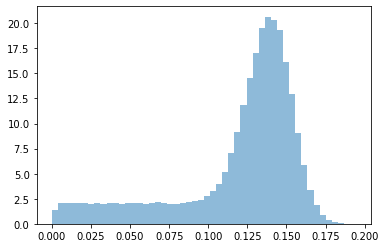

In [258]:
plt.hist(obs_deg_dist, bins=50, density=True, alpha=0.5);
#plt.hist(sim_deg_dist, bins=50, density=True, alpha=0.5);

In [ ]:
delay_to_ineraction_probability(theta, 
                                a = a, 
                                rho = rho, 
                                parameter = beta, 
                                parameter_type = 'delay')

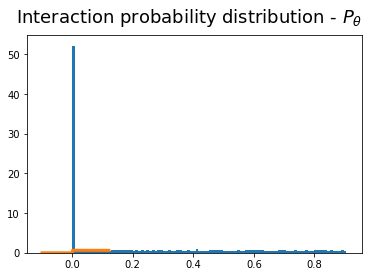

In [154]:
x = np.linspace(-0.1, k+0.1, 200)

plt.hist(probs, density=True, bins=100);
plt.plot(x, rng.pdf_conditional_probability(x, theta, beta, a, rho, 'delay'), linewidth=3)

plt.suptitle(r"Interaction probability distribution - $P_{\theta}$", fontsize=18);

In [155]:
def delay_to_ineraction_probability(theta, a, rho, parameter, parameter_type = 'rate'):
    return quad(lambda x : x*rng.pdf_conditional_probability(x, theta=theta, a = a, rho = rho,
                                                             parameter = parameter, 
                                                             parameter_type = parameter_type), 0, 1)[0]

def approximate_delay_to_interaction_probability(n, a, rho, parameter, parameter_type = 'rate'):
    index  = np.linspace(0, 2*PI, n)
    values = [delay_to_ineraction_probability(idx, 
                                                 a = a, 
                                                 rho = rho, 
                                                 parameter = beta, 
                                                 parameter_type = 'delay')
                      for idx in index]
    
    return pd.Series(values, index=index)

In [156]:
def approximate_degree_distribution(a, rho, parameter, n, parameter_type = 'delay'):
    s = approximate_delay_to_interaction_probability(n = n,
                                                     a = a, 
                                                     rho = rho, 
                                                     parameter = beta, 
                                                     parameter_type = parameter_type)
    
    index  = np.linspace(0, max(s), n)
    values = []
    
    for idx in index:
        if len(s[s < idx]) == 0:
            values.append(0)
        else:
            F1 = rng.cdf_delay(s[s < idx].index[-1], parameter = beta, parameter_type = parameter_type)
            F2 = rng.cdf_delay(s[s < idx].index[0 ], parameter = beta, parameter_type = parameter_type)

            values.append(F1-F2)
        
    return pd.Series(values, index=index)

In [210]:
%%time

N = 2**11

obs_deg_dist = []

for i in range(100):
    delas = rng.get_delays(N, beta)
    dists = rng.delays_to_distances(delas)
    simis = rng.distances_to_similarities(dists, a=a)
    probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
    deg_dist = np.sum(squareform(probs) > np.random.uniform(size=[N,N]), axis=1)
    obs_deg_dist += list(deg_dist/(N-1))

CPU times: user 15.9 s, sys: 2.44 s, total: 18.3 s
Wall time: 28 s


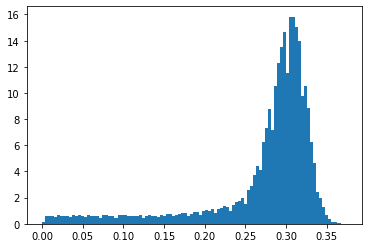

In [208]:
plt.hist(obs_deg_dist, bins=101, density=True);

In [144]:
%%time
s = approximate_degree_distribution(a=a, rho=rho, n=100, parameter=beta, parameter_type='delay')

/Users/markusyoussef/Desktop/git/supplements/venv/ringity/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  after removing the cwd from sys.path.


CPU times: user 28.7 s, sys: 402 ms, total: 29.1 s
Wall time: 30.7 s


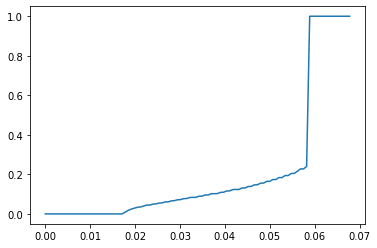

In [145]:
plt.plot(s.index, s.values)

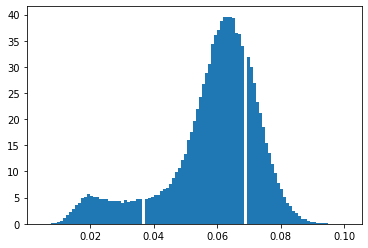

In [146]:
plt.hist(obs_deg_dist, bins=101, density=True);

In [147]:
cdf_x = np.sort(obs_deg_dist)
cdf_y = np.arange(len(obs_deg_dist))/len(obs_deg_dist)

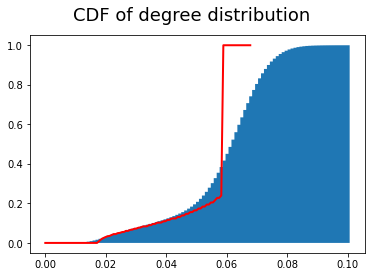

In [148]:
plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(s.index, s.values, linewidth=2, color='r')
plt.suptitle(r"CDF of degree distribution", fontsize=18);

In [98]:
rho

0.05840003316594777

In [52]:
thetas = np.linspace(0, 2*PI, 100)

deg0s = []

for theta in thetas:
    deg0s.append(delay_to_ineraction_probability(theta, 
                                                 a = a, 
                                                 rho = rho, 
                                                 parameter = beta, 
                                                 parameter_type = 'delay'))

/Users/markusyoussef/Desktop/git/supplements/venv/ringity/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  after removing the cwd from sys.path.


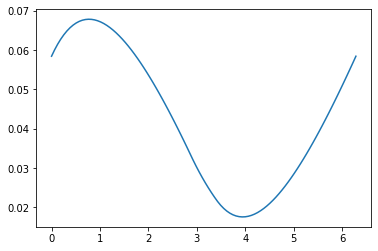

In [53]:
plt.plot(thetas, deg0s)

In [125]:
from scipy.optimize import fsolve

In [127]:
fsolve(lambda x : delay_to_ineraction_probability(theta=x,
                                                  a = a, 
                                                 rho = rho, 
                                                 parameter = beta, 
                                                 parameter_type = 'delay'),
       0)

/Users/markusyoussef/Desktop/git/supplements/venv/ringity/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([-2.60760702])

In [135]:
fsolve(lambda x : delay_to_ineraction_probability(theta=x,
                                                  a = a, 
                                                 rho = rho, 
                                                 parameter = beta, 
                                                 parameter_type = 'delay')-0.2,
       0.01)

array([-0.85681732])

In [130]:
? scipy.optimize.newton

### Network

In [106]:
N = 2**12
rho = 0.05
mu_S = rng.mean_similarity(lamb, a=a)
rate = lamb

In [107]:
pos, G = rng.network_model(N, rho, beta, a=0.5, return_positions=True)

print(nx.density(G))

0.050321585966117216


In [108]:
n_theta, = random.sample(range(N), 1)

theta = pos[n_theta]

print(theta)

0.2548546725420557


In [105]:
len(G[n_theta]), quad(lambda x : x*rng.pdf_conditional_probability(x, theta, beta, a, rho, 'delay'), 0, 1)[0]*(N-1)

(218, 222.9521448679885)

# Not sure if relevant anymore

In [78]:
k = rng.slope(rho, lamb, a)

In [79]:
k

0.06504243777424037

In [80]:
rho

0.05

In [81]:
assert rho > rng.mean_similarity(lamb, a=a), rng.mean_similarity(lamb, a=a)

AssertionError: 0.7687288747317242

In [22]:
k*quad(lambda t : t*rng.pdf_similarity(t, lamb, a=a), 0, 1/k)[0] + \
(1-rng.cdf_similarity(1/k, lamb, a=a))

0.04999999999999923

In [23]:
quad(lambda t : t*rng.pdf_similarity(t, lamb, a=a), 0, 1/k)[0]

0.0007116977771398157

In [64]:
2*a*PI * lamb / np.sinh(PI*lamb) * quad(lambda t : 
                                        t*np.cosh(PI*lamb * (1-2*a*(1-t))), 
                                        0, min(1/k,1))[0]

0.0007116977771398157

In [71]:
def slope_integral(rate, a, k):
    A = np.cosh((2*a-1) * PI * rate)
    B = np.cosh(PI*rate + 2*a*(1/k-1)*PI*rate)
    C = 2*a*PI*lamb*np.sinh(PI*rate + 2*a*(1/k-1)*PI*rate)/k
    
    numerator   = A-B+C
    denominator = (2*a*PI) * rate * np.sinh(PI*rate)
    return numerator / denominator

In [76]:
print(scipy.optimize.newton(
    func = lambda k: slope_integral(rate, a, k) + (1-rng.cdf_similarity(1/k, rate, a)) - rho,
    x0 = rho/mu_S))

11.693615313591526


In [77]:
k

6.112149303264688

In [85]:
mu_S = rng.mean_similarity(rate,a)
const = 1/np.sinh(PI*rate)

def integral(k): # This can probably be further simplified
    term1 = np.sinh((1 + 2*a*(1/k-1))*PI*rate)
    term2 = (k*np.sinh((a*PI*rate)/k)*np.sinh(((a+k-2*a*k)*PI*rate)/k))/(a*PI*rate)
    return term1-term2

print(scipy.optimize.newton(
    func = lambda k: const*(integral(k) + (1/const-np.sinh(rate*(PI-2*a*PI*(1-1/k))))) - rho,
    x0 = rho/mu_S))

6.112149303264961


In [52]:
mu_S = rng.mean_similarity(rate,a)

def k_to_rho(k): # This can probably be further simplified
    A = a*PI*rate
    B = PI*rate
    return 1 - k*np.sinh(A/k)*np.sinh(A/k + (B-2*A)) / (A*np.sinh(B))

print(scipy.optimize.newton(func = lambda k: k_to_rho(k) - rho, x0 = rho/mu_S))

6.112149303265188


In [69]:
mu_S = rng.mean_similarity(rate,a)
const = 1/np.sinh(PI*rate)

def integral(k): # This can probably be further simplified
    term1 = np.sinh((1 + 2*a*(1/k-1))*PI*rate)
    term2 = (k*np.sinh((a*PI*rate)/k)*np.sinh(((a+k-2*a*k)*PI*rate)/k))/(a*PI*rate)
    return term1-term2

print(scipy.optimize.newton(
    func = lambda k: const*integral(k) + (1-rng.cdf_similarity(1/k, rate, a)) - rho,
    x0 = rho/mu_S))

0.004350003072679767

In [70]:
const*integral(k)

0.004350003072680289

In [71]:
slope_integral(rate, a, k)

0.0007116977771437122

In [61]:
rate = lamb

term1 = np.sinh((1 + 2*a*(1/k-1))*PI*rate)
term2 = (k*np.sinh((a*PI*rate)/k)*np.sinh(((a+k-2*a*k)*PI*rate)/k))/(a*PI*rate)
term1-term2

0.03458644612948003

In [55]:
(np.cosh((2*a-1) * PI * lamb) - 
 np.cosh(PI*lamb + 2*a*(1/k-1)*PI*lamb) + 
 2*a*PI*lamb*np.sinh(PI*lamb + 2*a*(1/k-1)*PI*lamb)/k) / \
((2*a*PI) * lamb * np.sinh(PI*lamb))

0.0007116977771437122

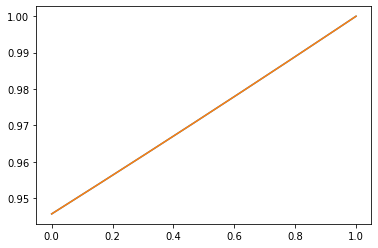

In [83]:
t = np.linspace(0,1, 200)

plt.plot(t, np.sinh(rate*(PI-2*a*PI*(1-t)))/np.sinh(rate*PI))
plt.plot(t, rng.cdf_similarity(t, theta=rate, a=a))

In [46]:
(np.cosh((2*a-1) * PI * lamb) - 
 np.cosh(PI*lamb + 2*a*(1/k-1)*PI*lamb) + 
 2*a*c*PI*lamb*np.sinh(PI*lamb + (2*a)*(1/k-1)*PI*lamb))/((2*a)**2 * (PI*lamb)**2)

0.10212808087268534

In [27]:
1/k

4.689569243318852

In [91]:
c = 2*PI*a

1 - (np.sinh(lamb*(PI-c)) / np.sinh(lamb*PI)) - \
1/(lamb*np.sinh(lamb*PI)*c) * (np.cosh(np.pi*lamb) - c*lamb*np.sinh(lamb*(np.pi-c)) - np.cosh(lamb*(np.pi-c)))

0.027417299558438666

In [95]:
mu_S = rng.mean_similarity(lamb,a)

scipy.optimize.newton(
            func = lambda k: 1 - np.sinh(lamb*(PI-c))/np.sinh(lamb*PI) - \
                             1/(lamb*np.sinh(lamb*PI)*c) * \
                             (np.cosh(np.pi*lamb) - c*lamb*np.sinh(lamb*(np.pi-c)) - np.cosh(lamb*(np.pi-c))) - rho/k,
            x0 = rho/mu_S)

1.823666108816712

In [96]:
k

6.112149303265226

In [97]:
rho/mu_S

1.8236661088167956

In [26]:
t = np.linspace(0,np.pi,200)

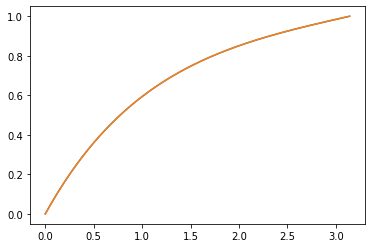

In [28]:
plt.plot(t, rng.cdf_circular_distance(t, lamb))
plt.plot(t, [quad(lambda tau:rng.pdf_circular_distance(tau, lamb), 0, ti)[0] for ti in t])

In [35]:
quad(lambda tau : tau*rng.pdf_circular_distance(tau, lamb), 0, 2*np.pi*a)[0]

0.45854588193670304

In [37]:
c = 2*np.pi*a

1/(lamb*np.sinh(lamb*np.pi)) * (np.cosh(np.pi*lamb) - c*lamb*np.sinh(lamb*(np.pi-c)) - np.cosh(lamb*(np.pi-c)))

0.45854588193670276